<a class="anchor" id="0"></a>
# MNIST - Deep Neural Network with Keras

# **Import libraries**

In [25]:
import numpy as np # linear algebra,/
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting library
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam ,RMSprop
from keras import  backend as K
from subprocess import check_output
from keras.utils import to_categorical, plot_model
print(check_output(["ls", "../input"]).decode("utf8"))

digit-recognizer



# **Loading the dataset**

In [26]:
# import dataset
from keras.datasets import mnist
# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


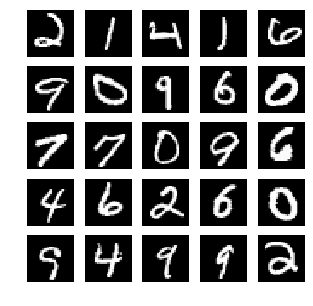

In [27]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

In [28]:
# compute the number of labels
num_labels = len(np.unique(y_train))
print(num_labels)

10


# **One-Hot Encoding**

In [29]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# **Data Preprocessing**

In [30]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [31]:
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [32]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

In [33]:
# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
activation_4 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_5 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

In [35]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [36]:
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
60000/60000 [==============================] - 1s 25us/step - loss: 0.4237 - accuracy: 0.8697
Epoch 2/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.1956 - accuracy: 0.9420
Epoch 3/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.1521 - accuracy: 0.9534
Epoch 4/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.1291 - accuracy: 0.9617
Epoch 5/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.1109 - accuracy: 0.9658
Epoch 6/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.1041 - accuracy: 0.9689
Epoch 7/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0966 - accuracy: 0.9695
Epoch 8/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.0867 - accuracy: 0.9728
Epoch 9/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.0803 - accuracy: 0.9747
Epoch 10/20
60000/60000 [==============================

# **Evaluating model performance**

In [37]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

10000/10000 [==============================] - 0s 17us/step

Test accuracy: 98.3%
